# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

## Features 

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation 

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline # we want our plots to appear inside the notebook 


UsageError: unrecognized arguments: # we want our plots to appear inside the notebook


## Load Data 

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Exploratory data analysis

In [5]:
df['zip'].value_counts().head() # top 5 zipcodes for 911 calls

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().head() # top 5 townships(twp) for 911 calls

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
df['title'].nunique() # unique title codes 

110

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. We are going to use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 



In [8]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])

In [9]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

**most common Reason for a 911 call based off of this new column**

In [10]:
df['Reason'].value_counts() # EMS is the most common call for 911

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

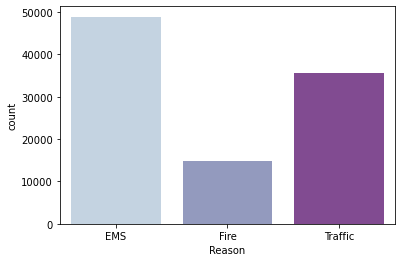

In [11]:
sns.countplot(x='Reason',data=df,palette='BuPu');

In [13]:
#plt.colormaps()

In [12]:
type(df['timeStamp'].iloc[0])

str

 **These timestamps are still strings. we're going to use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [15]:
time = df['timeStamp'].iloc[4]

In [16]:
time.dayofweek

3

**Now that the timestamp column are actually DateTime objects, we're going to create 3 new columns called Hour, Month, and Day of Week. We will create these columns based off of the timeStamp column.**

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)

In [19]:
df['Month'] = df['timeStamp'].apply(lambda y : y.month)

In [20]:
df['Day'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [21]:
df['Day of Week'] = df['Day'].map(dmap)  

In [22]:
df.drop('Day',axis=1,inplace=True)

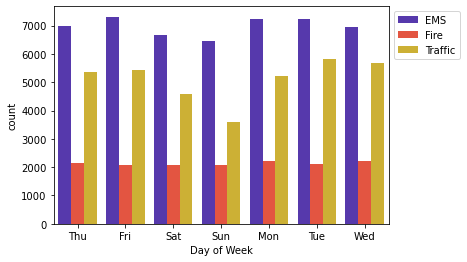

In [23]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='CMRmap')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**Now we do the same for Month:**

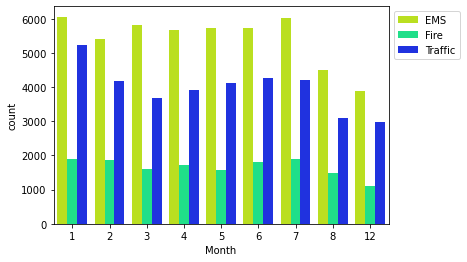

In [24]:
sns.countplot(x='Month',data=df,hue='Reason',palette='gist_rainbow')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**We could noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

In [25]:
byMonth = df.groupby('Month').count()

In [26]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [27]:
sns.set_style('whitegrid')

**Now we going to create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot:xlabel='Month'>

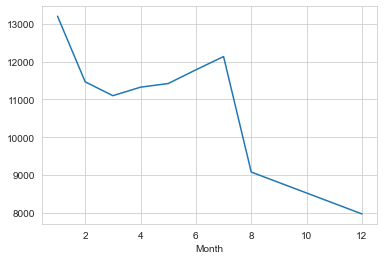

In [28]:
byMonth['lat'].plot()

**Now see if we can use seaborn's lmplot() to create a linear fit on the number of calls per month.**

In [29]:
byMonth.reset_index(inplace=True)

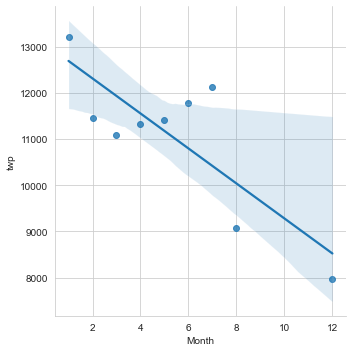

In [31]:
sns.lmplot(x='Month',y='twp',data=byMonth)

**We will create a new column called 'Date' that contains the date from the timeStamp column.** 

In [32]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

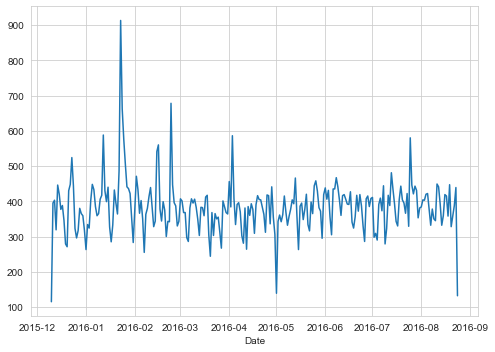

In [33]:
dcolumn = df.groupby('Date').count()
dcolumn['twp'].plot(figsize=(7,5))
plt.tight_layout()

**Now we'll recreate this plot but with 3 separate plots with each plot representing a Reason for the 911 call**

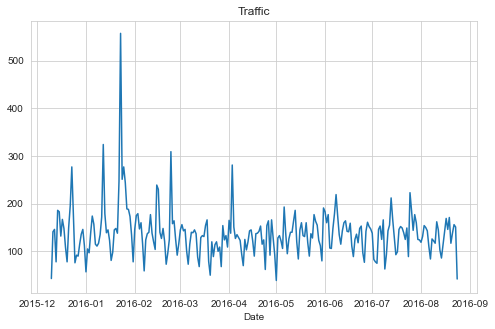

In [34]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(figsize=(8,5))
plt.title('Traffic');

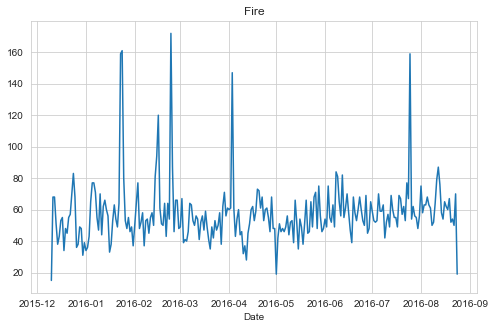

In [35]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(figsize=(8,5))
plt.title('Fire');

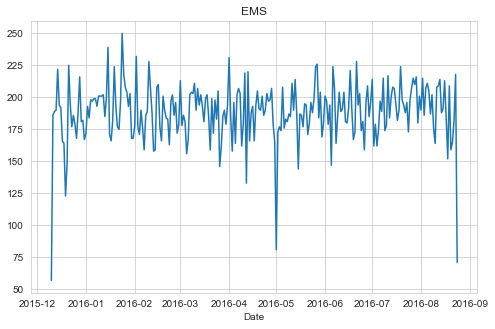

In [36]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(figsize=(8,5))
plt.title('EMS');

**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [37]:
df2 = df.groupby(['Day of Week','Hour']).count().unstack()

In [38]:
df2['lat'].head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Now we'll create a HeatMap using this new DataFrame.**

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

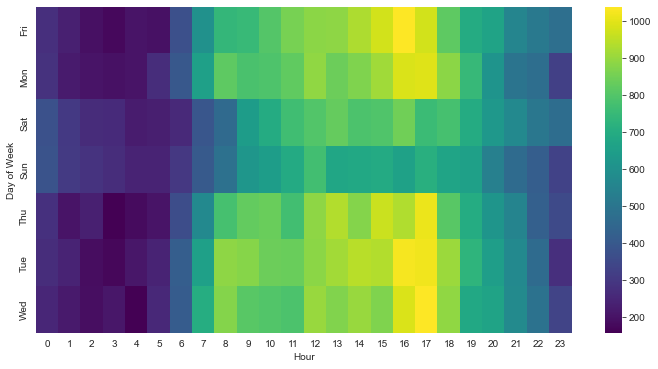

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(df2['lat'],cmap='viridis')

**Now we'll create a clustermap using this DataFrame.**

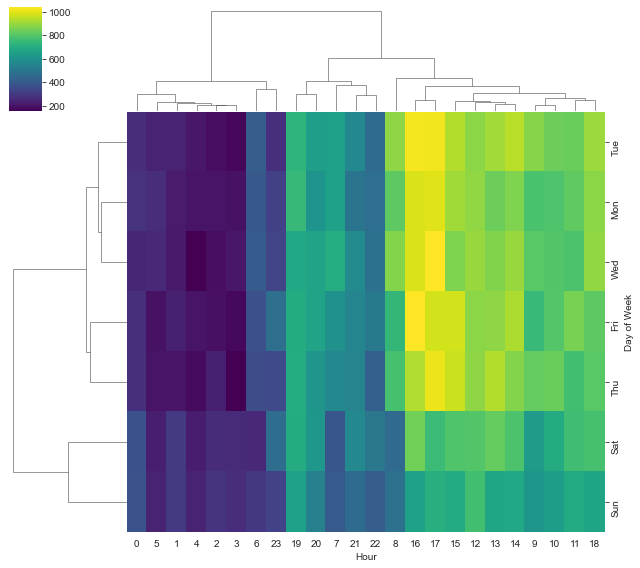

In [40]:
sns.clustermap(df2['lat'],cmap='viridis',figsize=(9,8))

**Now we'll repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [41]:
df3 = df.groupby(['Day of Week','Month']).count().unstack()

In [42]:
df3['lat'].head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

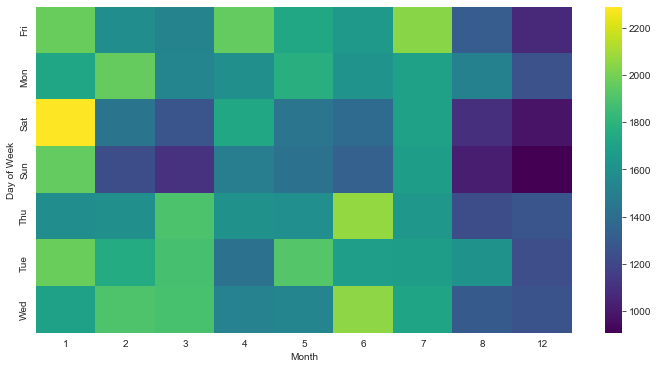

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df3['lat'],cmap='viridis')

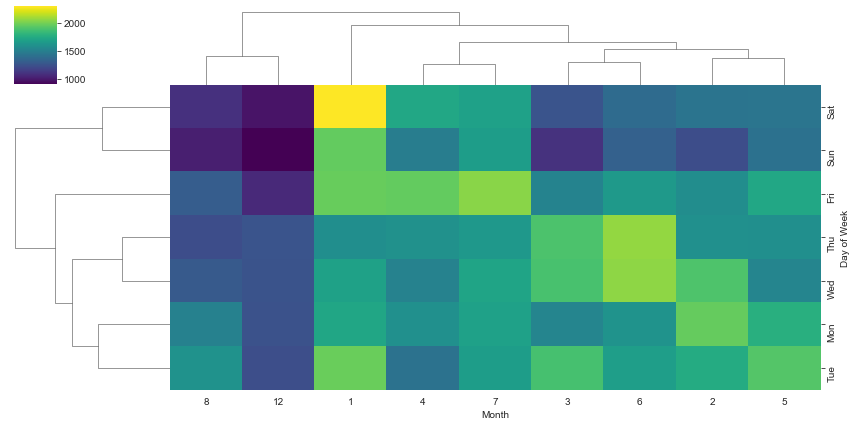

In [44]:
sns.clustermap(df3['lat'],cmap='viridis',figsize=(12,6))